In [3]:
import os
import numpy as np

from labtools import LabTools

## Workflow Example - Radioactive Decay

$$N(t) = N_0 \cdot \exp(-\lambda \, t)$$

### 1. Linear Regression

$$\ln(N) = \ln(N_0) − \lambda \, t$$

#### 1.1. Prior Calculation : $\ln(N)$

In [6]:
if False:
    with LabTools(
            foldername='Decay', filename='Radioactive_Decay',
            variables='N', equations='lnN = ln(N)'
        ) as lab:
        lab.load_data()
        lab.apply_formula()
        lab.unload_data(processed_mark='+')
        
    # Open the results file in Excel
    if False:
        os.startfile(lab.results_path)

#### 1.2. Regression

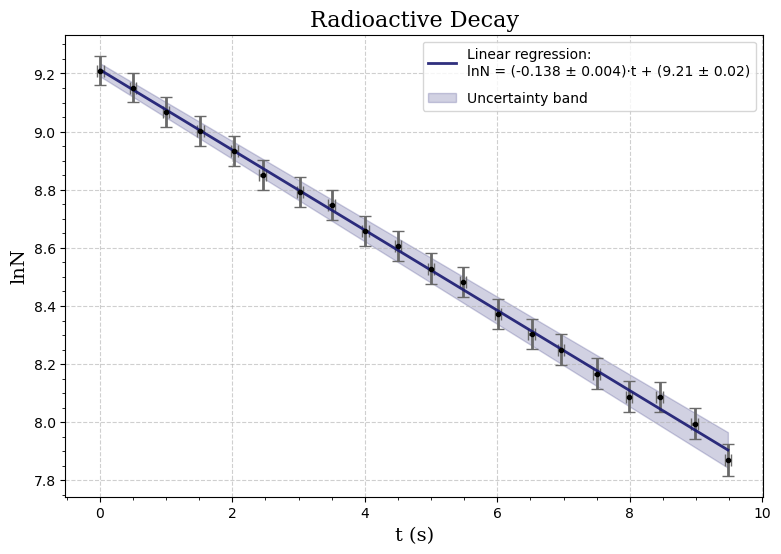

In [3]:
with LabTools(
        foldername='Decay', filename='Radioactive_Decay+',
        variables='t, lnN',
        x_label='t (s)', y_label='lnN', title='Radioactive Decay',
    ) as lab:
    lab.load_data()
    lab.linear_regression()
    lab.plot_regression()

    A, B = lab.regression_results['coefficients']
    lnN0, lamb = A, -B
    err_lnN0, err_lamb = lab.regression_results['errors']

In [4]:
lamb, err_lamb

(0.1380299335852953, 0.004093008036827832)

#### Obtain the lifetime $\tau$

$$\tau = \ln(2)/\lambda $$

In [5]:
with LabTools(variables = 'lamb', equations = 'tau = ln(2) / lamb') as lab:
    tau, err_tau = lab.propagate_uncertainty(lamb, err_lamb)
    res = lab.rounder(tau, err_tau)

print(f'tau = {res[0]} s')

tau = 5.02 ± 0.15 s


$$\tau = 5.02 \pm 0.15 \, \text{s}$$

### 2. Exponential Regression

In [2]:
import os
import numpy as np

from labtools import LabTools

{'parameters': array([1.38029934e-01, 1.00275420e+04]), 'errors': array([0., 0.]), 'function': <function N_func at 0x000002B0B4FA8540>, 'formula': None}


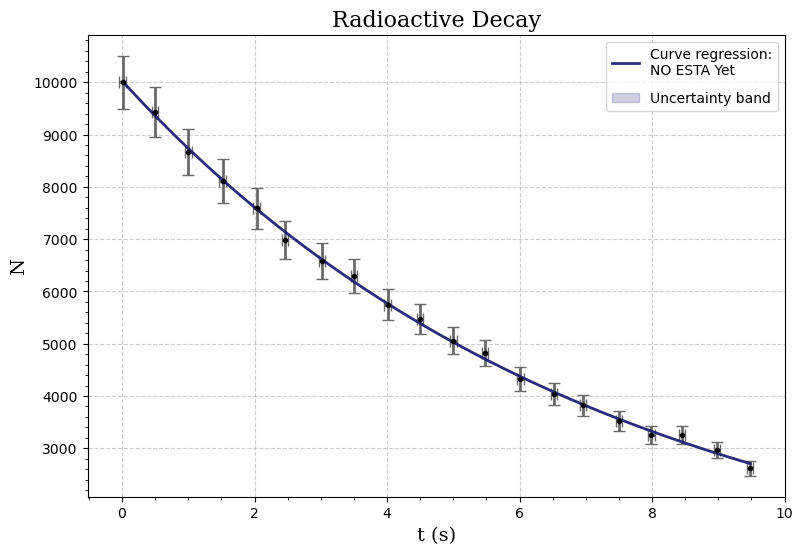

tau = 5.02171639553544 s


In [6]:
from labtools import analysis

def N_func(params, t):
    lamb, N0 = params
    return N0 * np.exp(-lamb * t)
    # return N0 * (1 - lamb * t)

with LabTools(
        foldername='Decay', filename='Radioactive_Decay',
        variables='t, N',
        x_label='t (s)', y_label='N', title='Radioactive Decay',
    ) as lab:
    lab.load_data()
    lab.unprocessed_data
    lab.curve_regression(N_func, [lamb, np.exp(lnN0)])
    lab.plot_regression()

    # for key, value in lab.extracted_data.items():
    #     print(f'{key} = {list(value)}\n{value.name}')
    
    lamb, N0 = lab.regression_results['parameters']

    tau = np.log(2) / lamb
    print(f'tau = {tau} s')